In [25]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [7]:
import numpy as np
import pandas as pd
import cv2
import os #specify location
import matplotlib.pyplot as plt
import pickle
from PIL import Image               

In [8]:
Dir = "C:/Users/kalpa/Desktop/PetImages"
categ =['Cat','dog']

In [9]:
for c in categ:
    folder =os.path.join(Dir,c)
    print(folder) 

C:/Users/kalpa/Desktop/PetImages\Cat
C:/Users/kalpa/Desktop/PetImages\dog


In [10]:
IMG_SIZE = 50  # Replace with your actual desired width
IMG_height = 50  # Replace with your actual desired height
data=[]
for c in categ:
    folder =os.path.join(Dir,c)
    label=categ.index(c)
    for img in os.listdir(folder):
        img_path = os.path.join(folder, img)
        img_arr = cv2.imread(img_path)
    # Check if img_arr is not None and has non-empty dimensions
        if img_arr is not None and img_arr.size != 0:
                img_arr = cv2.resize(img_arr, (IMG_SIZE, IMG_height))
                data.append([img_arr, label])
        else:
               print(f"Error reading or resizing image: {img_path}")

In [11]:
len(data)

24947

In [12]:
import random
random.shuffle(data) 

In [13]:
data[0]

[array([[[  1,  62, 118],
         [  0,  73, 127],
         [  0,  73, 126],
         ...,
         [ 14,  89, 143],
         [  1,  75, 129],
         [  9,  89, 142]],
 
        [[  7,  81, 135],
         [  6,  82, 135],
         [  3,  82, 135],
         ...,
         [ 10,  90, 143],
         [  2,  77, 130],
         [  7,  87, 140]],
 
        [[  9,  86, 139],
         [ 13,  92, 145],
         [  7,  77, 134],
         ...,
         [ 11,  91, 144],
         [  1,  80, 135],
         [ 14,  94, 149]],
 
        ...,
 
        [[ 78, 158, 211],
         [ 80, 160, 213],
         [ 78, 163, 215],
         ...,
         [ 41,  79, 214],
         [ 49,  87, 239],
         [ 89, 170, 222]],
 
        [[ 79, 165, 217],
         [ 84, 170, 222],
         [ 87, 167, 220],
         ...,
         [ 86, 173, 223],
         [ 95, 175, 228],
         [ 80, 160, 213]],
 
        [[ 88, 164, 217],
         [ 88, 164, 217],
         [ 81, 161, 214],
         ...,
         [ 99, 182, 232],
  

In [14]:
x=[]
y=[]
for featu,labels in data:
    x.append(featu)
    y.append(labels)

In [15]:
x=np.array(x)
y=np.array(y)

In [16]:
len(x)

24947

In [17]:
len(y)

24947

In [18]:
#pickle.dump(x,open('x.pkl','wb'))
#pickle.dump(y,open('y.pkl','wb'))



In [19]:
x=x/255

In [20]:
y

array([1, 0, 0, ..., 1, 0, 0])

In [21]:
x.shape

(24947, 50, 50, 3)

In [23]:
#training the mode
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [24]:

model=Sequential()
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,input_shape=x.shape[1:],activation='relu'))
model.add(Dense(2,activation='softmax'))

In [25]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',#this is used when only 2 output neurons
             metrics=['accuracy'],run_eagerly=True)#want to research on optimisers

In [26]:
history=model.fit(x,y,epochs=6,validation_split=0.2) 

Epoch 1/6
624/624 [==============================] - 112s 177ms/step - loss: 0.6287 - accuracy: 0.6361 - val_loss: 0.5495 - val_accuracy: 0.7176
Epoch 2/6
624/624 [==============================] - 112s 180ms/step - loss: 0.5075 - accuracy: 0.7499 - val_loss: 0.4715 - val_accuracy: 0.7814
Epoch 3/6
624/624 [==============================] - 107s 172ms/step - loss: 0.4567 - accuracy: 0.7842 - val_loss: 0.4641 - val_accuracy: 0.7824
Epoch 4/6
624/624 [==============================] - 95s 152ms/step - loss: 0.4164 - accuracy: 0.8087 - val_loss: 0.4287 - val_accuracy: 0.8072
Epoch 5/6
624/624 [==============================] - 103s 164ms/step - loss: 0.3761 - accuracy: 0.8294 - val_loss: 0.4187 - val_accuracy: 0.8108
Epoch 6/6
624/624 [==============================] - 101s 162ms/step - loss: 0.3284 - accuracy: 0.8573 - val_loss: 0.4538 - val_accuracy: 0.7942


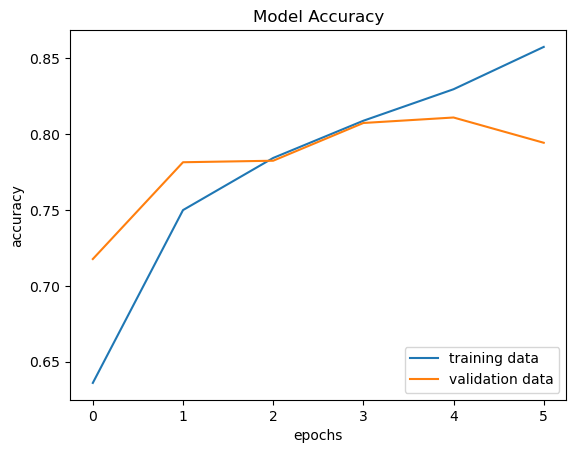

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Model Accuracy")
plt.legend(['training data','validation data'],loc='lower right')

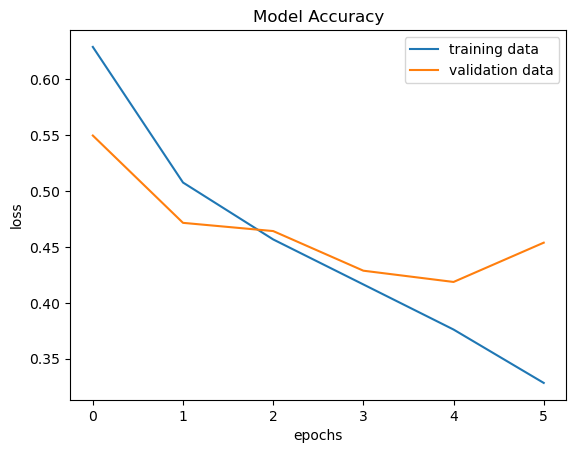

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Model Accuracy")
plt.legend(['training data','validation data'],loc='upper right')

In [36]:
final_training_accuracy = history.history['accuracy'][-1]

# Access final validation accuracy
final_validation_accuracy = history.history['val_accuracy'][-1]

print(f"Final Training Accuracy: {final_training_accuracy}")
print(f"Final Validation Accuracy: {final_validation_accuracy}")

Final Training Accuracy: 0.8572931885719299
Final Validation Accuracy: 0.794188380241394


In [37]:
y_pred=model.predict(x)

780/780 [==============================] - 270s 340ms/step


In [46]:
from keras.applications.imagenet_utils import decode_predictions

In [47]:
#testing the model
#lets check the 2 images for cat and dog.
import os
from keras.preprocessing import image
import numpy as np
img_path = r"C:\Users\kalpa\Desktop\image1.jpg"
# Check if the file exists
if os.path.exists(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))  # Adjust target_size as needed
    
    # Convert the image to a numpy array
    img_array = image.img_to_array(img)
    
    # Expand dimensions to match the model's expected input shape
    img_array = np.expand_dims(img_array, axis=0)
    
    # Rest of your code for processing the image
else:
    print(f"Error: The file '{img_path}' does not exist.")

# Preprocess the input data (normalize pixel values, etc.) 

# Load a pre-trained ResNet50 model
from tensorflow.keras.applications.resnet50 import ResNet50
model = ResNet50(weights='imagenet')
# Make predictions
# Make predictions
predictions = model.predict(img_array)
decoded_predictions = decode_predictions(predictions, top=1)[0]

# Extract the class label and probability
class_label = decoded_predictions[0][1]
probability = decoded_predictions[0][2]

# Rest of your code based on predictions
pred = round(probability)
if pred == 0:
    # Your code for the case where the prediction is 0
    print("Cat")
else:
    # Your code for the case where the prediction is not 0
    print("Dog")

1/1 [==============================] - 3s 3s/step
Dog


In [ ]:
Model Architecture: Cats vs Dogs Classification CNN

Input: RGB Images (e.g., 224x224 pixels)

Convolutional Base:
1. Conv2D (Filters: 32, Kernel Size: (3, 3), Activation: ReLU, Input Shape: (224, 224, 3))
2. MaxPooling2D (Pool Size: (2, 2))

2. Conv2D (Filters: 64, Kernel Size: (3, 3), Activation: ReLU)
3. MaxPooling2D (Pool Size: (2, 2))

3. Conv2D (Filters: 128, Kernel Size: (3, 3), Activation: ReLU)
4. MaxPooling2D (Pool Size: (2, 2))

Flatten Layer:
5. Flatten

Dense Layers:
6. Dense (Units: 128, Activation: ReLU)
7. Dropout (Rate: 0.5)  # Optional for regularization

8. Dense (Units: 1, Activation: Sigmoid)  # Binary classification: Cats or Dogs

Compile:
- Loss: Binary Crossentropy
- Optimizer: Adam
- Metrics: Accuracy